[생선 무게 찾기]

@ 농어(perch)의 길이 feature를 사용해 무게 예측하기

- 데이터셋: fish.csv
- feature(특성): Length
- target(라벨): Weight
- 학습 방법: 지도학습 > 회귀
- 학습 알고리즘: 선형회귀

1) 데이터 준비

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
file='../data/fish.csv'

In [25]:
data=pd.read_csv(file,usecols=[0,1,2])
data

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [26]:
mask=data['Species']=='Perch'
perch_df=data[mask]
perch_df=perch_df.drop('Species',axis=1).copy()
perch_df=perch_df.reset_index(drop=True).copy()
perch_df

,Weight,Length
0,5.9,8.4
1,32.0,13.7
2,40.0,15.0
3,51.5,16.2
4,70.0,17.4
5,100.0,18.0
6,78.0,18.7
7,80.0,19.0
8,85.0,19.6
9,85.0,20.0


In [27]:
perch_df.corr()

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


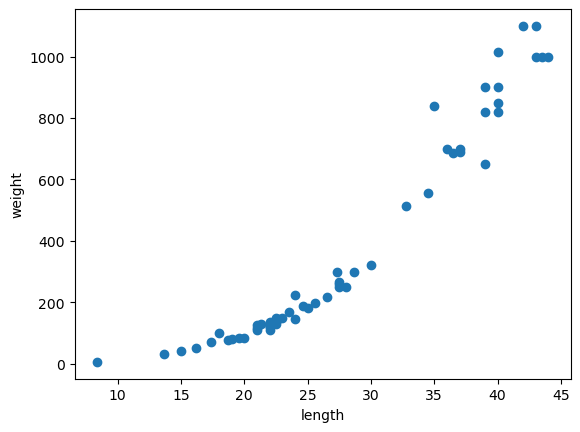

In [28]:
plt.scatter(perch_df.Length, perch_df.Weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [34]:
length=pd.DataFrame(perch_df['Length'])
length

,Length
0,8.4
1,13.7
2,15.0
3,16.2
4,17.4
5,18.0
6,18.7
7,19.0
8,19.6
9,20.0


In [35]:
weight=pd.Series(perch_df['Weight'])
weight

0        5.9
1       32.0
2       40.0
3       51.5
4       70.0
5      100.0
6       78.0
7       80.0
8       85.0
9       85.0
10     110.0
11     115.0
12     125.0
13     130.0
14     120.0
15     120.0
16     130.0
17     135.0
18     110.0
19     130.0
20     150.0
21     145.0
22     150.0
23     170.0
24     225.0
25     145.0
26     188.0
27     180.0
28     197.0
29     218.0
30     300.0
31     260.0
32     265.0
33     250.0
34     250.0
35     300.0
36     320.0
37     514.0
38     556.0
39     840.0
40     685.0
41     700.0
42     700.0
43     690.0
44     900.0
45     650.0
46     820.0
47     850.0
48     900.0
49    1015.0
50     820.0
51    1100.0
52    1000.0
53    1100.0
54    1000.0
55    1000.0
Name: Weight, dtype: float64

2) 모델 생성 및 학습 진행

In [30]:
from sklearn.linear_model import LinearRegression

In [36]:
model=LinearRegression()
model.fit(length,weight)

LinearRegression()

In [37]:
print(f'기울기: {model.coef_}, 절편: {model.intercept_}')

기울기: [36.93837597], 절편: -648.0775582457378


In [40]:
pre_weight=model.coef_[0]*length+model.intercept_
pre_weight=pre_weight.values.reshape(-1)

In [41]:
real_weight=weight.to_numpy()

In [42]:
real_weight-pre_weight

array([ 343.69520012,  174.02180749,  134.00191873,  101.17586757,
         75.34981641,   83.18679082,   35.32992765,   26.24841486,
          9.08538928,   -5.68996111,  -17.62833708,  -12.62833708,
         -2.62833708,   -8.70984987,  -44.56671305,  -44.56671305,
        -34.56671305,  -29.56671305,  -54.56671305,  -53.03590103,
        -33.03590103,  -45.42357622,  -51.50508901,  -49.974277  ,
        -13.44346498,  -93.44346498,  -72.60649056,  -95.38184095,
       -100.54486653, -112.7894049 ,  -60.34010568, -107.72778087,
       -102.72778087, -117.72778087, -136.19696885, -112.05383203,
       -140.07372079,  -49.5011735 ,  -70.29641264,  195.23439937,
        -15.17316458,   18.2960234 ,  -18.64235256,  -28.64235256,
        107.4808955 , -142.5191045 ,   27.4808955 ,   20.54251953,
         70.54251953,  185.54251953,   -9.45748047,  196.6657676 ,
         59.72739163,  159.72739163,   41.25820364,   22.78901566])

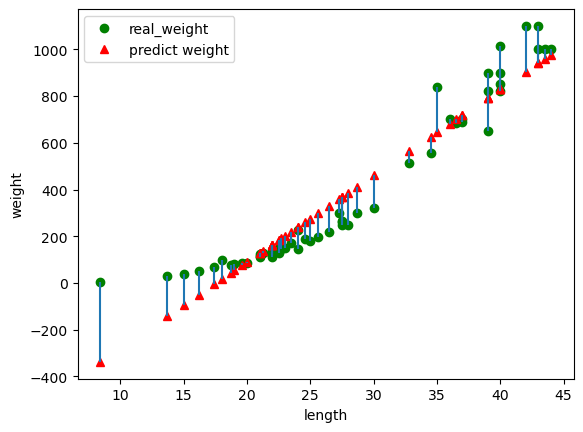

In [50]:
plt.plot(length,weight,'go',label='real_weight')
plt.plot(length,pre_weight,'r^',label='predict weight')
plt.vlines(length,weight, pre_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

3) 모델 성능 평가

In [45]:
model.score(length,weight)

0.919021073244782

In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [47]:
pre_y=model.predict(length)

In [48]:
mse=mean_squared_error(weight,pre_y)
rmse=mean_squared_error(weight,pre_y,squared=False)
mae=mean_absolute_error(weight,pre_y)
r2=r2_score(weight,pre_y)

In [49]:
print(f'mse: {mse}')
print(f'rmse: {rmse}')
print(f'mae: {mae}')
print(f'r2: {r2}')

mse: 9610.599638718502
rmse: 98.03366584351777
mae: 74.54938126568918
r2: 0.919021073244782
